<a href="https://colab.research.google.com/github/akashmavle5/tutorial/blob/master/akash_dash004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install "dask[complete]" --upgrade
!python -m pip install dask distributed --upgrade

Requirement already up-to-date: dask[complete] in /usr/local/lib/python3.7/dist-packages (2021.4.0)
Requirement already up-to-date: dask in /usr/local/lib/python3.7/dist-packages (2021.4.0)
Requirement already up-to-date: distributed in /usr/local/lib/python3.7/dist-packages (2021.4.0)


In [2]:
%matplotlib inline

In [3]:
from dask.distributed import Client

# Scale up: connect to your own cluster with more resources
# see http://dask.pydata.org/en/latest/setup.html
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

Client Scheduler: inproc://172.28.0.2/288/1 Dashboard: http://172.28.0.2:8787/status,Cluster Workers: 1 Cores: 4 Memory: 1.86 GiB


In [4]:
!pip install dask_ml
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [5]:
# Scale up: increase n_samples or n_features
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(10000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [6]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

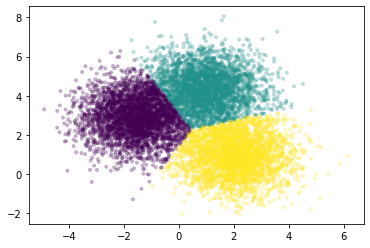

In [7]:
fig, ax = plt.subplots()
ax.scatter(X[::1000, 0], X[::1000, 1], marker='.', c=km.labels_[::1000],
           cmap='viridis', alpha=0.25);